✅ Data Loaded
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

✅ One-hot encoding done. Shape: (4521, 43)

✅ Train-test split complete

✅ Model trained

✅ Eval

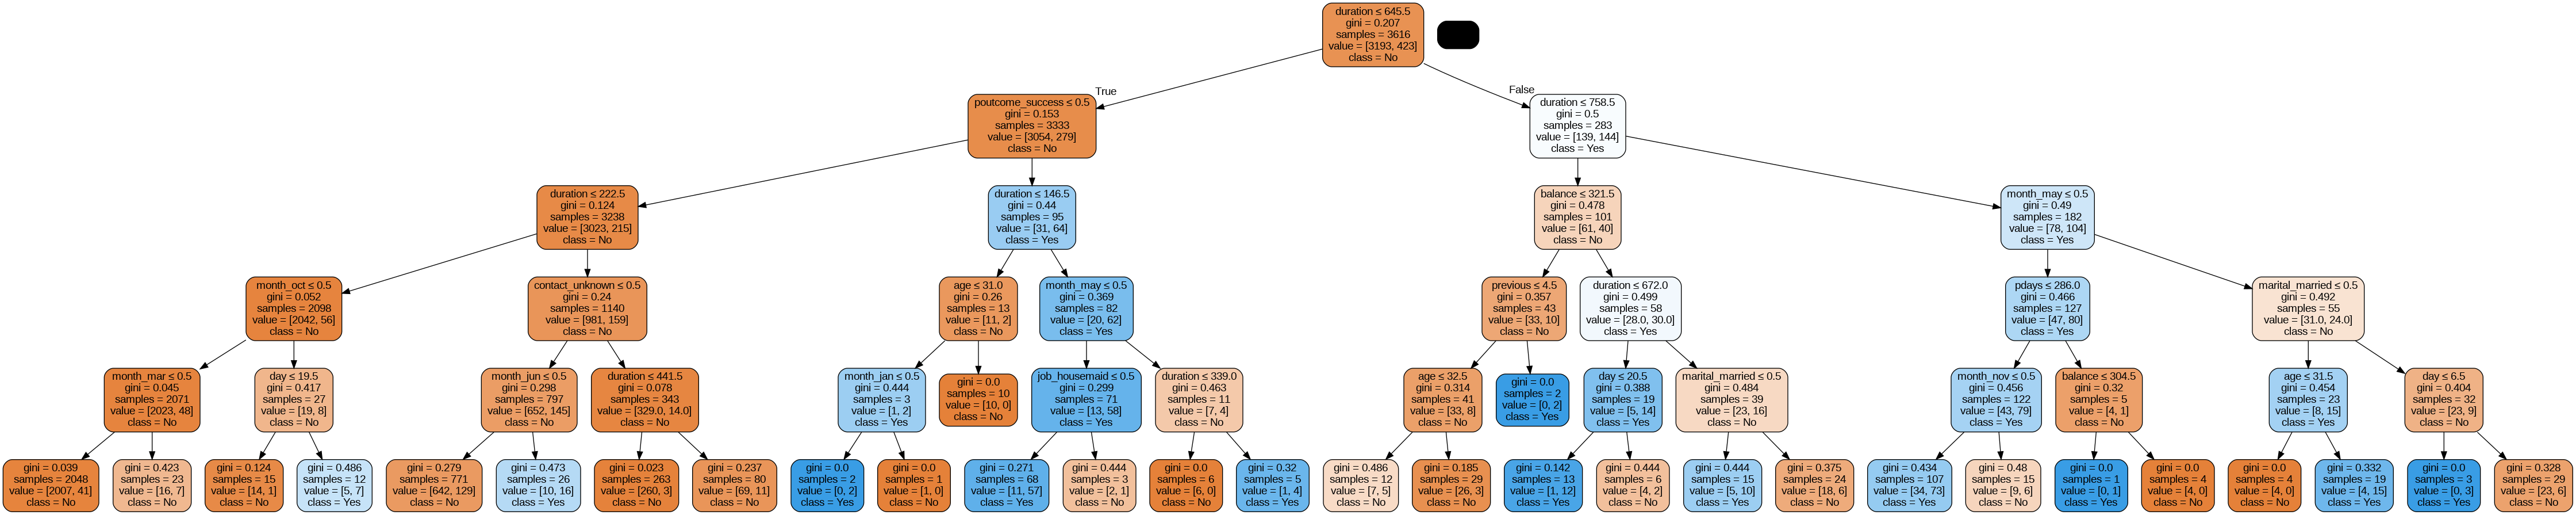

In [16]:
# Task 3: Decision Tree Classifier on Bank Marketing Dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import graphviz
from sklearn import tree
import pydotplus
from io import StringIO
from IPython.display import Image

# Step 1: Load dataset manually
df = pd.read_csv("bank.csv", sep=';')
print("✅ Data Loaded")
print(df.head())

# Step 2: Preprocess categorical data
df = pd.get_dummies(df, drop_first=True)
print("\n✅ One-hot encoding done. Shape:", df.shape)

# Step 3: Train-test split
X = df.drop("y_yes", axis=1)
y = df["y_yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Train-test split complete")

# Step 4: Train Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
print("\n✅ Model trained")

# Step 5: Evaluate
y_pred = clf.predict(X_test)
print("\n✅ Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 6: Visualize using Graphviz
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Save the image to a file
graph.write_png("decision_tree.png")
Image(graph.create_png())

In [17]:
from google.colab import files
files.download('decision_tree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>